In [1]:
import pandas as pd
import numpy as np
import pybnesian as pbn
import matplotlib.pyplot as plt
import os
import glob
import time
from util_funcs import *

In [2]:
2**14

16384

N fix

e2


/tmp/ipykernel_1170/647424917.py:84: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


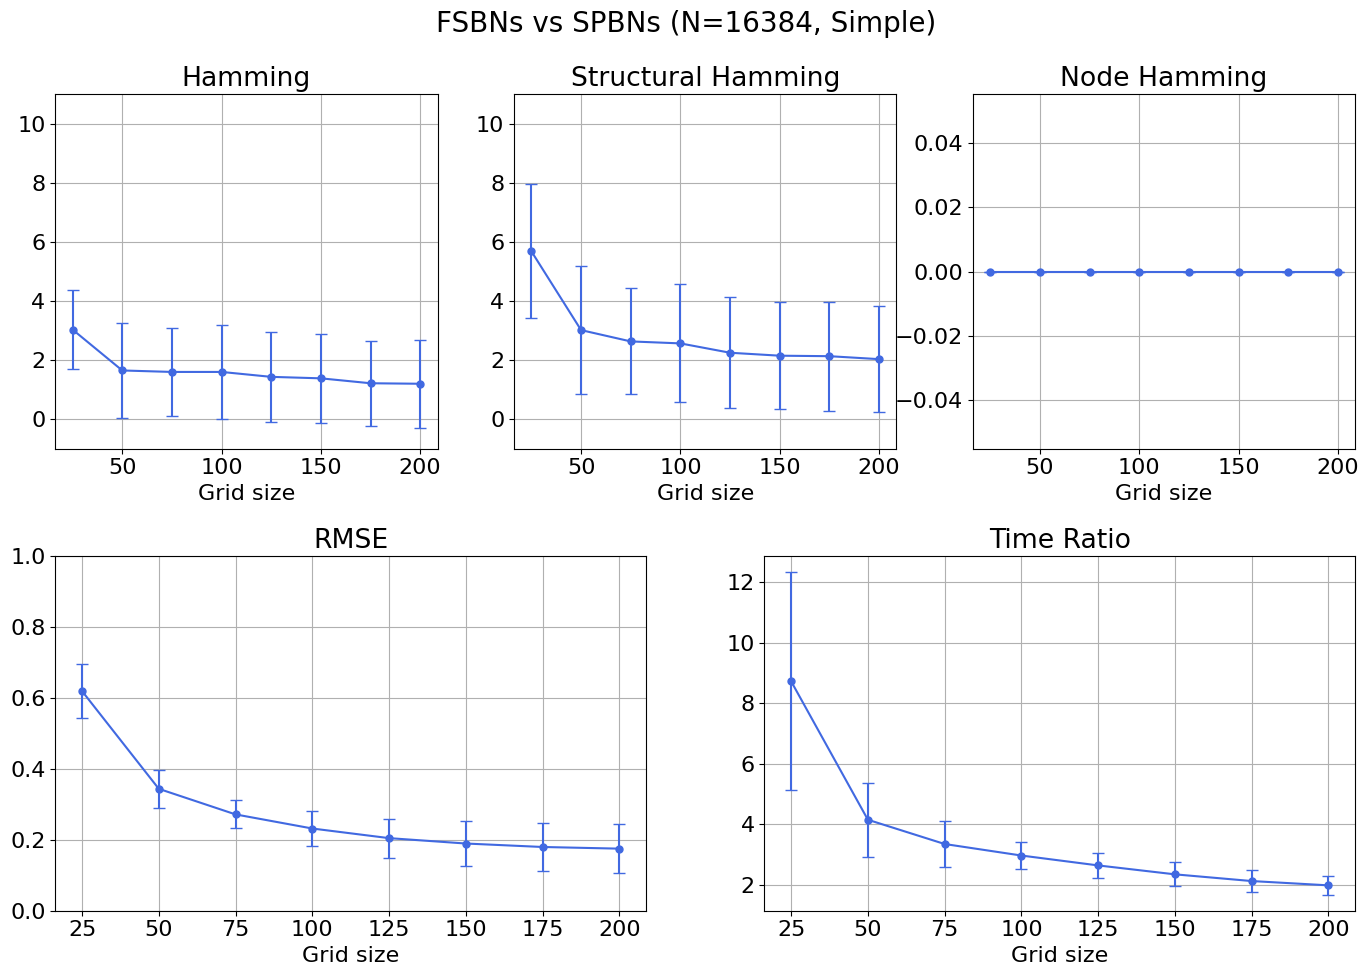

In [30]:
paths = ['results/NfIX/exp0/N16384/*.csv']
df_all = []
for path in paths:
    ress = glob.glob(path)
    ress = sorted(ress)
    hasM = path.split('/')[3][1:]


    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(14, 10), layout="constrained")
    fig.suptitle(f'FSBNs vs SPBNs (N={hasM}, Simple)', fontsize=20)
    gs0 = fig.add_gridspec(2, 1)
    gs00 = gs0[0].subgridspec(1, 3)
    gs10 = gs0[1].subgridspec(1, 2)


    ax00 = fig.add_subplot(gs00[0, 0])
    ax00.set_title('Hamming')
    ax00.set_xlabel('Grid size')
    ax00.set_ylim(-1,11)

    ax01 = fig.add_subplot(gs00[0, 1])
    ax01.set_title('Structural Hamming')
    ax01.set_xlabel('Grid size')
    ax01.set_ylim(-1,11)

    ax02 = fig.add_subplot(gs00[0, 2])
    ax02.set_title('Node Hamming')
    ax02.set_xlabel('Grid size')

    ax10 = fig.add_subplot(gs10[0, 0])  
    ax10.set_title('RMSE')
    ax10.set_xlabel('Grid size')
    ax10.set_ylim(0,1)

    ax11 = fig.add_subplot(gs10[0, 1])
    ax11.set_title('Time Ratio')
    ax11.set_xlabel('Grid size')
    # ax11.set_ylabel('Seconds')

    for nrs, res in enumerate(ress):
        filename = os.path.basename(res).split('_')[1]
        df0 = pd.read_csv(res)
        df_all.append(df0)

        if nrs%5==0 and nrs!=0:
            bridge = filename[:2]
            # bridge = 'Loiola'
            print(bridge)
            df_all = pd.concat(df_all).reset_index(drop=True)
        
            df_all['time_diff'] = df_all['time_spbn']/df_all['time_fbn']
            df = df_all.groupby('grid').mean().reset_index()
            dfstev = df_all.groupby('grid').std().reset_index()
            df_all = []

            config = dict(color = 'royalblue',
                          fmt='o', linestyle='-', capsize=4, markersize=5, label=bridge)
            ax00.errorbar(x=df['grid'], y=df['hamming'], yerr=dfstev['hamming'], **config)
            ax00.grid(True)
            
            ax01.errorbar(x=df['grid'], y=df['shamming'], yerr=dfstev['shamming'], **config)
            ax01.grid(True)
            
            ax02.errorbar(x=df['grid'], y=df['type_hamming'], yerr=dfstev['type_hamming'], **config)   
            ax02.grid(True)
            
            ax10.errorbar(x=df['grid'], y=df['rmse'], yerr=dfstev['rmse'], **config)
            ax10.grid(True)

            ax11.errorbar(x=df['grid'], y=df['time_diff'], yerr=dfstev['time_diff'], **config)
            ax11.grid(True)

            


    handles, labels = [], []
    for ax in [ax00, ax01, ax02, ax10, ax11]:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Check to avoid duplicates
                handles.append(handle)
                labels.append(label)
    # fig.legend(handles, labels,loc='upper right', bbox_to_anchor=(1.07, 0.5), borderaxespad=0.)
    fig.tight_layout()
    fig.savefig(f'results/N{hasM}_simple_means_all.pdf', format='pdf', bbox_inches="tight")
    fig.show()  


e2


/tmp/ipykernel_1170/3818332435.py:84: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


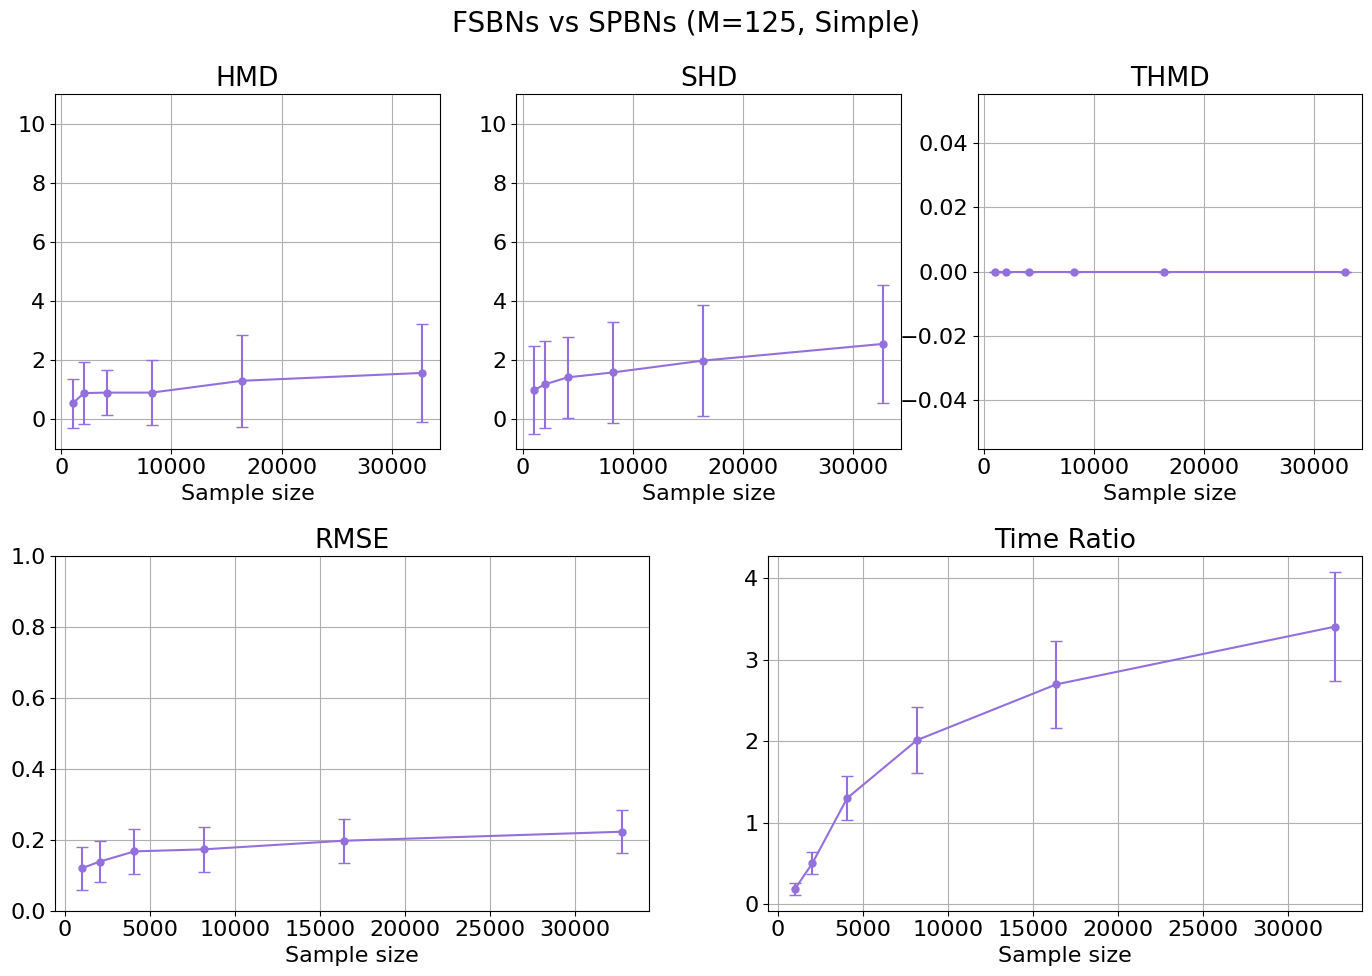

In [31]:
paths = ['results/Mfix/exp3_simple/M125/*.csv']
df_all = []
for path in paths:
    ress = glob.glob(path)
    ress = sorted(ress)
    hasM = path.split('/')[3][1:]


    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(14, 10), layout="constrained")
    fig.suptitle(f'FSBNs vs SPBNs (M={hasM}, Simple)', fontsize=20)
    gs0 = fig.add_gridspec(2, 1)
    gs00 = gs0[0].subgridspec(1, 3)
    gs10 = gs0[1].subgridspec(1, 2)


    ax00 = fig.add_subplot(gs00[0, 0])
    ax00.set_title('HMD')
    ax00.set_xlabel('Sample size')
    ax00.set_ylim(-1,11)

    ax01 = fig.add_subplot(gs00[0, 1])
    ax01.set_title('SHD')
    ax01.set_xlabel('Sample size')
    ax01.set_ylim(-1,11)

    ax02 = fig.add_subplot(gs00[0, 2])
    ax02.set_title('THMD')
    ax02.set_xlabel('Sample size')

    ax10 = fig.add_subplot(gs10[0, 0])  
    ax10.set_title('RMSE')
    ax10.set_xlabel('Sample size')
    ax10.set_ylim(0,1)

    ax11 = fig.add_subplot(gs10[0, 1])
    ax11.set_title('Time Ratio')
    ax11.set_xlabel('Sample size')
    # ax11.set_ylabel('Seconds')

    for nrs, res in enumerate(ress):
        filename = os.path.basename(res).split('_')[1]
        df0 = pd.read_csv(res)
        df_all.append(df0)

        
        if nrs%5==0 and nrs!=0:
            bridge = filename[:2]
            # bridge = 'Loiola'
            print(bridge)
            df_all = pd.concat(df_all).reset_index(drop=True)
        
            df_all['time_diff'] = df_all['time_spbn']/df_all['time_fbn']
            df = df_all.groupby('instances').mean().reset_index()
            dfstev = df_all.groupby('instances').std().reset_index()
            df_all = []

            config = dict(color = 'mediumpurple',
                          fmt='o', linestyle='-', capsize=4, markersize=5, label=bridge)
            ax00.errorbar(x=df['instances'], y=df['hamming'], yerr=dfstev['hamming'], **config)
            ax00.grid(True)
            
            ax01.errorbar(x=df['instances'], y=df['shamming'], yerr=dfstev['shamming'], **config)
            ax01.grid(True)
            
            ax02.errorbar(x=df['instances'], y=df['type_hamming'], yerr=dfstev['type_hamming'], **config)   
            ax02.grid(True)
            
            ax10.errorbar(x=df['instances'], y=df['rmse'], yerr=dfstev['rmse'],**config)
            ax10.grid(True)

            ax11.errorbar(x=df['instances'], y=df['time_diff'], yerr=dfstev['time_diff'], **config)
            
            ax11.grid(True)


    handles, labels = [], []
    for ax in [ax00, ax01, ax02, ax10, ax11]:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Check to avoid duplicates
                handles.append(handle)
                labels.append(label)
    # fig.legend(handles, labels,loc='upper right', bbox_to_anchor=(1.07, 0.5), borderaxespad=0.)
    fig.tight_layout()
    fig.savefig(f'results/M{hasM}_simple_means_all.pdf', format='pdf', bbox_inches="tight")
    fig.show()  


In [47]:
def timestamp_2_datetime(df):
    fact = 10**6 if df['timestamp'][0]>9*10**9 else 1
    df['timestamp'] = df['timestamp']/fact 
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    return df

['data/aingura/dfg/dfg_e1v1.csv', 'data/aingura/dfg/dfg_e1v2.csv', 'data/aingura/dfg/dfg_e1v3.csv', 'data/aingura/dfg/dfg_e2v1.csv', 'data/aingura/dfg/dfg_e2v2.csv', 'data/aingura/dfg/dfg_e2v3.csv']
                           timestamp  DAMP_FAC0_-_  DAMP_FAC1_-_  \
0      2023-09-01 09:00:55.404850006      0.003696      0.007950   
1      2023-09-01 09:29:54.833595037      0.021582      0.053210   
2      2023-09-01 09:40:31.206990004      0.028341      0.026284   
3      2023-09-01 09:45:14.194665909      0.023261      0.106021   
4      2023-09-01 10:17:06.796380043      0.040191      0.056573   
...                              ...           ...           ...   
194819 2024-06-16 23:48:41.658291101      0.019546      0.101651   
194820 2024-06-16 23:49:48.156686068      0.022419      0.108583   
194821 2024-06-16 23:52:55.300345898      0.081379      0.228231   
194822 2024-06-16 23:54:13.558258057      0.044072      0.207352   
194823 2024-06-16 23:58:17.837948084      0.063492   

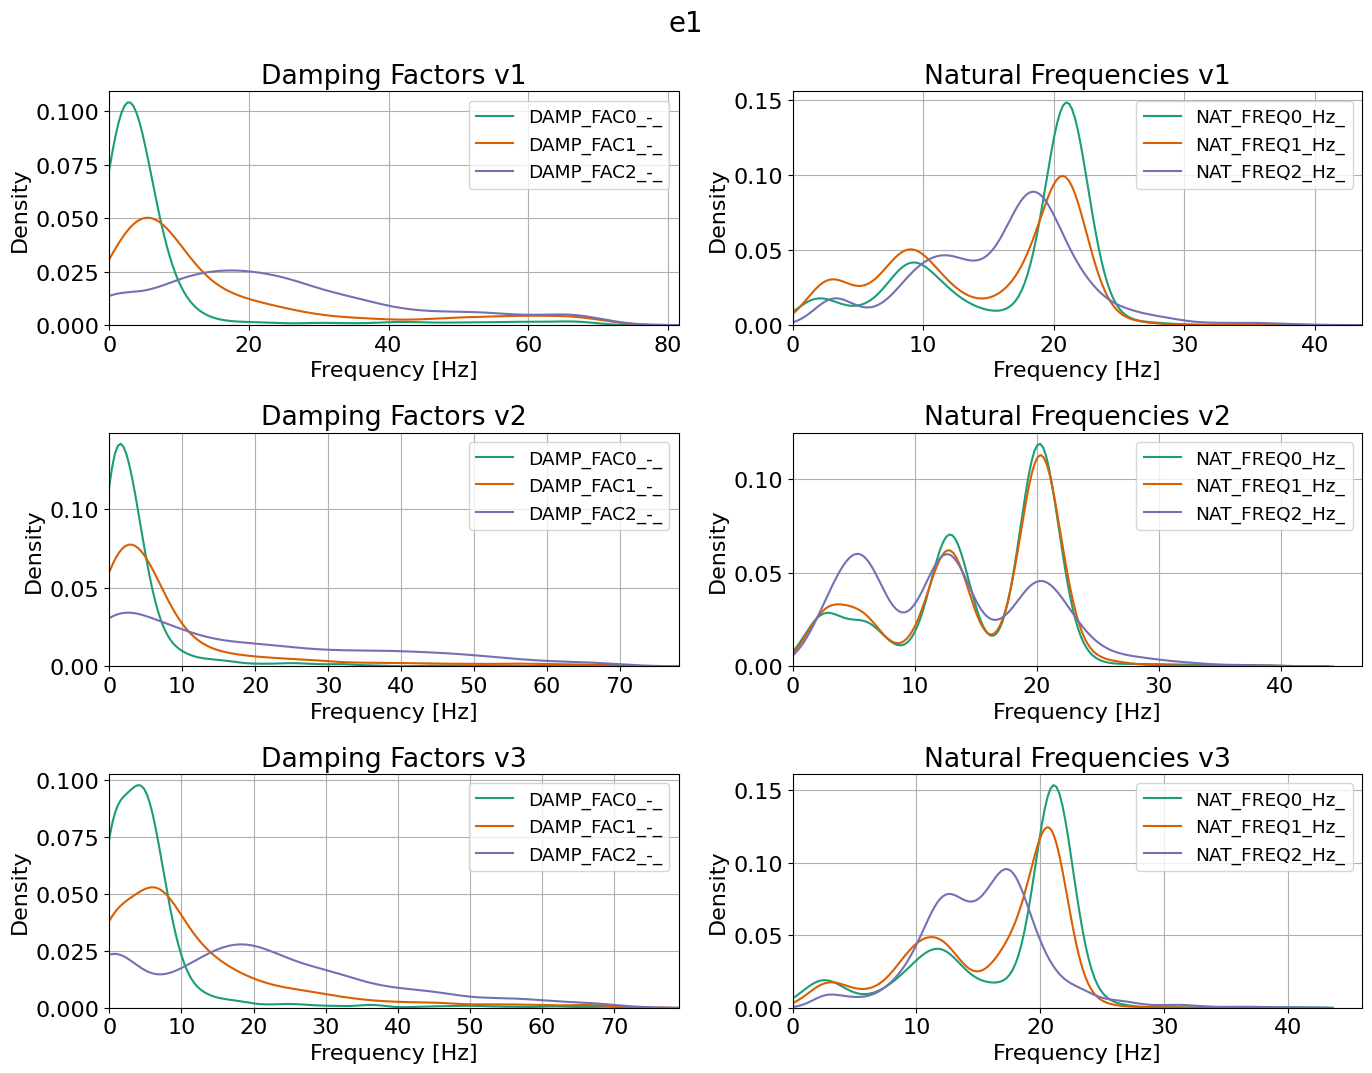

                           timestamp  DAMP_FAC0_-_  DAMP_FAC1_-_  \
0      2023-09-01 10:21:02.632241964      0.029060      0.041096   
1      2023-09-01 10:26:41.896524906      0.021762      0.088629   
2      2023-09-01 10:56:46.985642910      0.033495      0.132733   
3      2023-09-01 11:14:20.428235054      0.048252      0.374864   
4      2023-09-01 11:47:17.997025013      0.030718      0.064817   
...                              ...           ...           ...   
230825 2024-06-16 23:49:57.291090965      0.289827      0.067582   
230826 2024-06-16 23:50:53.644637108      0.066177      0.153708   
230827 2024-06-16 23:53:25.947846889      0.215295      0.056845   
230828 2024-06-16 23:54:26.119353056      0.081898      0.165379   
230829 2024-06-16 23:54:45.274496078      0.091498      0.241669   

        DAMP_FAC2_-_  NAT_FREQ0_Hz_  NAT_FREQ1_Hz_  NAT_FREQ2_Hz_  
0           0.104510      19.316947      23.190977      15.997069  
1           0.054156      18.178169      12.936

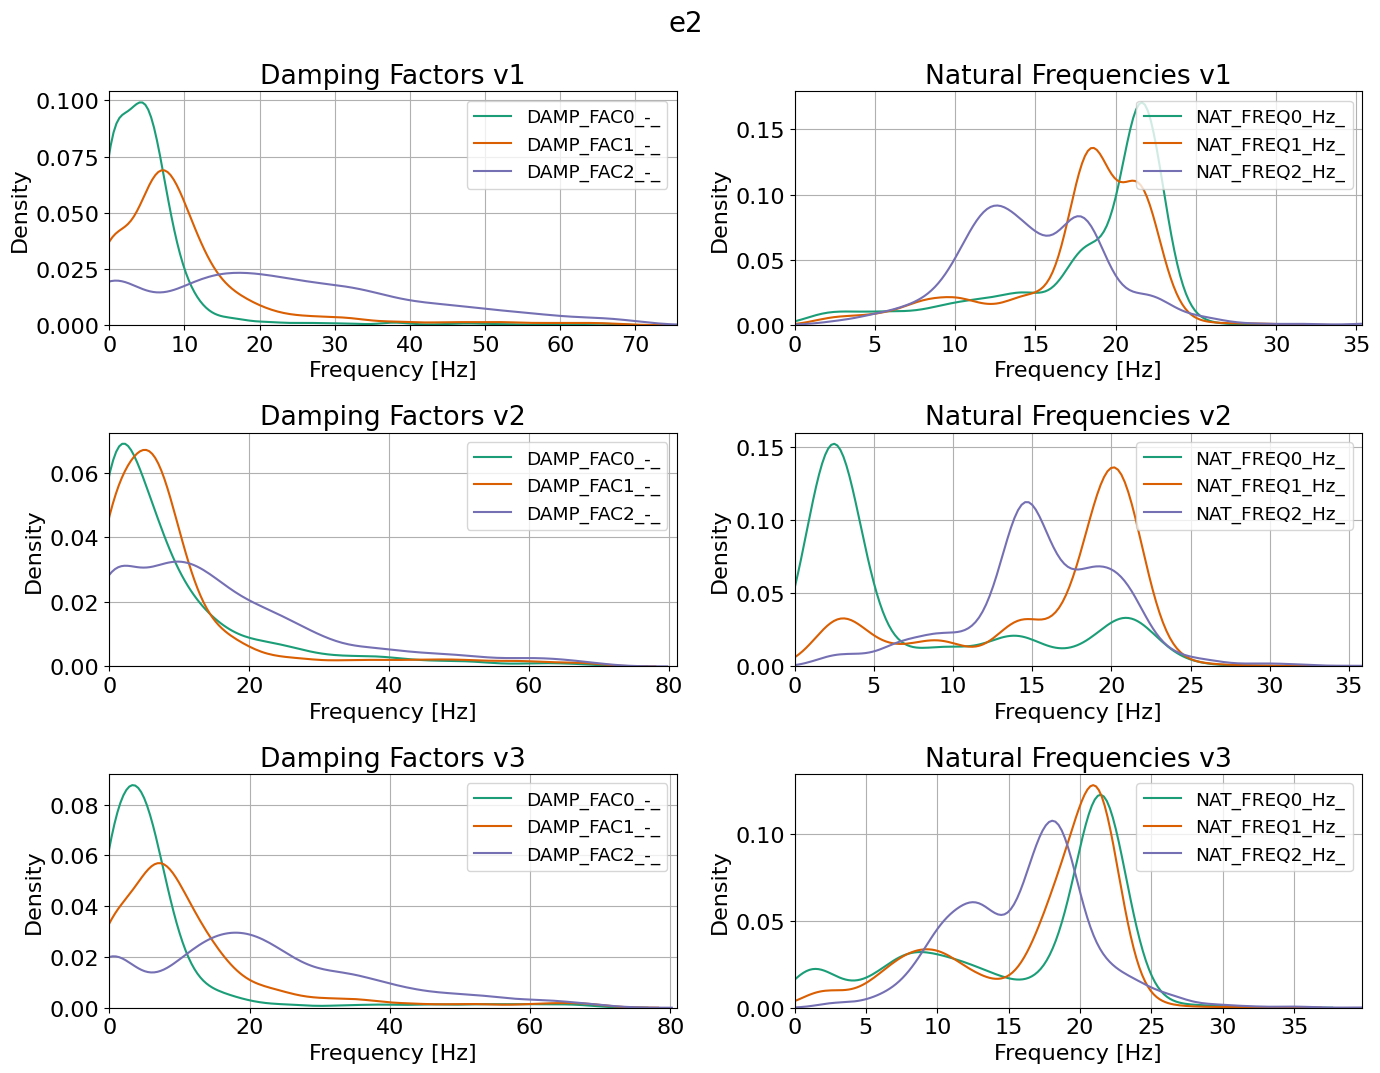

In [48]:
import seaborn as sns

# sns.set(style="whitegrid")
# sns.set_context("notebook", font_scale=1.5)  # Adjust the font scale here

datapaths = sorted(glob.glob('data/aingura/dfg/*.csv'))
plt.rcParams.update({'font.size': 16})
cmap = plt.get_cmap('Dark2')
print(datapaths)
for n, path in enumerate(datapaths):
    data = pd.read_csv(path,sep=';')
    dagats = timestamp_2_datetime(data)
    print(data)
    datasampl = data.sample(2048)
    span = path.split("/")[-1].split('_')[-1][:-4]
    nax = n%3

    if n==0 or n==3:
        fig, axes = plt.subplots(3,2,figsize=(14,11))
        
        fig.suptitle(f'{span[:-2]}', fontsize=20)
    for nc, col in enumerate(data.columns[1:]):
        
        j = nc//3
        if j == 0:
            axes[nax,0].set_title(f'Damping Factors v{nax+1}')
            axes[nax,0].set_xlabel("Frequency [Hz]")
        elif j == 1:
            axes[nax,1].set_title(f'Natural Frequencies v{nax+1}')
            axes[nax,1].set_xlabel("Frequency [Hz]")
        
        color = cmap(nc%3)
        sns.kdeplot(datasampl[col], label=col, ax=axes[nax,j],color=color)
        axes[nax,j].set_xlim(0)
        axes[nax,j].legend(fontsize='small', loc='upper right')
        axes[nax,j].grid(True)
        # elif 'NAT' in col:
        #     sns.kdeplot(datasampl[col], label=col, ax=axes[nax,1])
        #     axes[nax,1].set_xlim(0)
        #     axes[nax,1].legend()
            
            
    if n==2 or n==5:
        plt.tight_layout()
        # fig.savefig(f'results/{span[:-2]}_distributions.pdf', format='pdf', bbox_inches="tight")
        plt.show()
    
        

[<Axes: > <Axes: >]
[<Axes: title={'center': 'Damping Factors'}, xlabel='Frequency [Hz]', ylabel='Density'>
 <Axes: >]
[<Axes: title={'center': 'Damping Factors'}, xlabel='Frequency [Hz]', ylabel='Density'>
 <Axes: >]


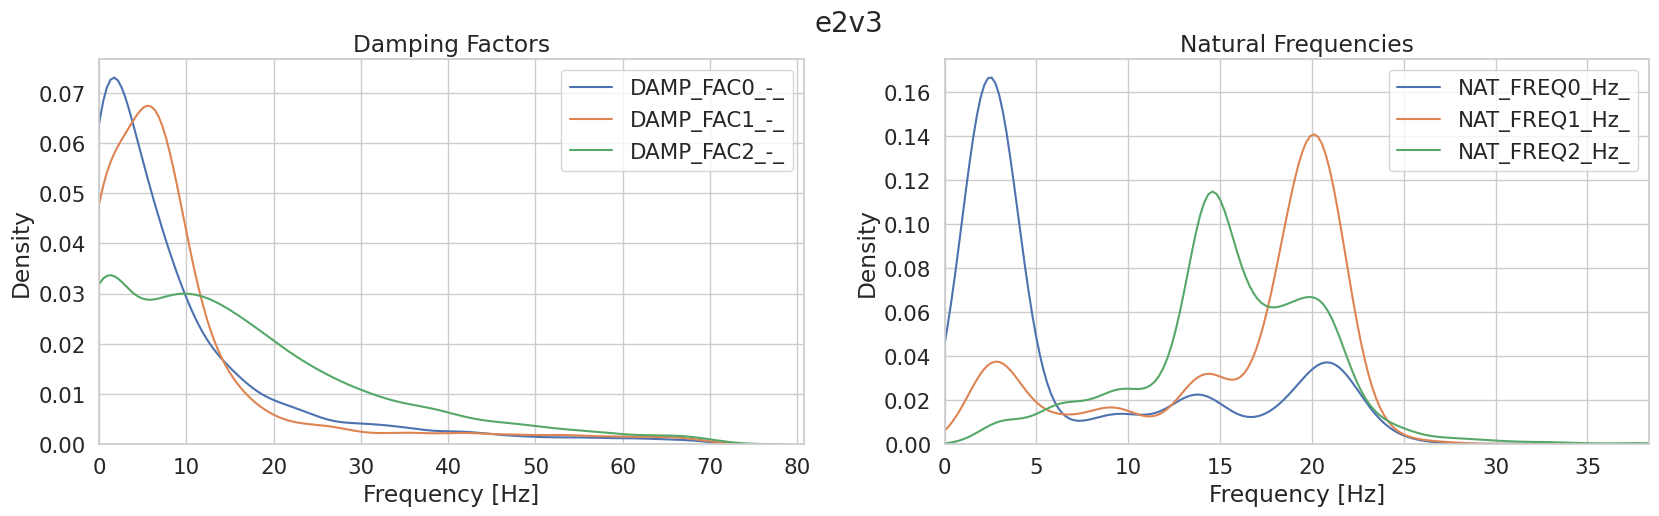

In [152]:

data = pd.read_csv(datapaths[-2],sep=';')
datasampl = data.sample(4096)
span = path.split("/")[-1].split('_')[-1][:-4]

fig, ax = plt.subplots(1,2,figsize=(20,5))
fig.suptitle(f'{span}', fontsize=20)
for nc, col in enumerate(data.columns[1:]):
    j = nc//3
    if j == 0:
        print(ax)
        ax[0].set_title(f'Damping Factors')
        ax[0].set_xlabel("Frequency [Hz]")
    elif j == 1:
        ax[1].set_title(f'Natural Frequencies')
        ax[1].set_xlabel("Frequency [Hz]")
    
    
    sns.kdeplot(datasampl[col], label=col, ax=ax[j])
    ax[j].set_xlim(0)
    ax[j].legend()
        

In [16]:
nodemap = {}

nodes = data.columns[1:]
for nc in range(len(nodes)):
    nodemap[nodes[nc]] = nc
nodemap

{'DAMP_FAC0_-_': 0,
 'DAMP_FAC1_-_': 1,
 'DAMP_FAC2_-_': 2,
 'DAMP_FAC3_-_': 3,
 'DAMP_FAC4_-_': 4,
 'NAT_FREQ0_Hz_': 5,
 'NAT_FREQ1_Hz_': 6,
 'NAT_FREQ2_Hz_': 7,
 'NAT_FREQ3_Hz_': 8,
 'NAT_FREQ4_Hz_': 9}

In [4]:
fft = True
M = 100
dataf_sampl = data.sample(2**14, random_state=15)




hc = pbn.GreedyHillClimbing()
vl = pbn.CVLikelihoodFT(dataf_sampl, k=5, grid_size= M, seed=0)
start_fbn = pbn.FourierNetwork(nodes=nodes)
start_spbn = pbn.SemiparametricBN(nodes=nodes)
pool = pbn.OperatorPool([pbn.ArcOperatorSet(), pbn.ChangeNodeTypeSet()])


In [ ]:
n=0
pathsave = f'results/exp{n}/{start_fbn}/M{M}'
if not os.path.exists(pathsave):
    os.makedirs(pathsave)


print(f"Start {start_fbn} estimation with {dataf_sampl.shape[0]} and grid size of {M}")
start = time.time()
model = hc.estimate(operators = pool, score = vl, start = start_fbn)
model.fit(dataf_sampl)
logl_ft = model.logl(dataf_sampl)
end = time.time()
print(f'{start_fbn} HC Elapsed time: {end-start}')
print(f'{start_fbn} Mean logl: {np.mean(logl_ft)}')


draw_model(model, pathsave +f'/model_{start_fbn}')
logldf = pd.DataFrame({'score': logl_ft})
logldf.to_csv(pathsave +f'/logl_{start_fbn}.csv', index=False)

Start FourierNetwork estimation with 16384 and grid size of 100
FourierNetwork HC Elapsed time: 177.26091384887695
FourierNetwork Mean logl: -25.389480615541025


In [ ]:
n=0
pathsave = f'results/exp{n}/{start_spbn}/M{M}'
if not os.path.exists(pathsave):
    os.makedirs(pathsave)


print(f"Start {start_spbn} estimation with {dataf_sampl.shape[0]} and grid size of {M}")
start = time.time()
model = hc.estimate(operators = pool, score = vl, start = start_spbn)
model.fit(dataf_sampl)
logl_ft = model.logl(dataf_sampl)
end = time.time()
print(f'{start_spbn} HC Elapsed time: {end-start}')
print(f'{start_spbn} Mean logl: {np.mean(logl_ft)}')


draw_model(model, pathsave +f'/model_{start_spbn}')
logldf = pd.DataFrame({'score': logl_ft})
logldf.to_csv(pathsave +f'/logl_{start_spbn}.csv', index=False)